<a href="https://colab.research.google.com/github/zishi1997/Data-Sci-GeoSpatial_Exercise/blob/main/Exercise_GeoSpatial_Chen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import Conda

In [250]:
#%env PYTHONPATH=

In [251]:
# %%bash
# MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
# MINICONDA_PREFIX=/usr/local
# wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
# chmod +x $MINICONDA_INSTALLER_SCRIPT
# ./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

In [252]:
# !which conda

In [253]:
# !conda --version

In [254]:
# !which python

In [255]:
# !python --version

In [256]:
# %%bash
# conda install --channel defaults conda python=3.6 --yes
# conda update --channel defaults --all --yes

In [257]:
# !conda --version # now returns 4.8.3
# !python --version

In [258]:
# import sys
# sys.path

In [259]:
# !ls /usr/local/lib/python3.6/dist-packages

In [260]:
# import sys
# _ = (sys.path
        # .append("/usr/local/lib/python3.6/site-packages"))

In [261]:
# !conda install --channel conda-forge featuretools --yes

In [262]:
# !conda install --channel conda-forge geopandas

###Install Geo

In [263]:
!pip install geopandas

In [264]:
!pip install geoplot

In [265]:
!pip install rtree pygeos

In [266]:
 #!pip install pipdeptree

In [267]:
#!pipdeptree

###Implementation

In [268]:
import os
import rtree
import pygeos
import pandas as pd
import geopandas as gpd
import geoplot.crs as gcrs
import geoplot as gplt
import matplotlib.pyplot as plt
import numpy as np

from shapely.geometry import Point

In [269]:
gpd.read_file?

In [270]:
# Read shapefile
ph = gpd.read_file('/content/gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


In [271]:
type(ph)

geopandas.geodataframe.GeoDataFrame

(116.44448662100001,
 127.08919715900001,
 3.7627797585000007,
 21.894300891500002)

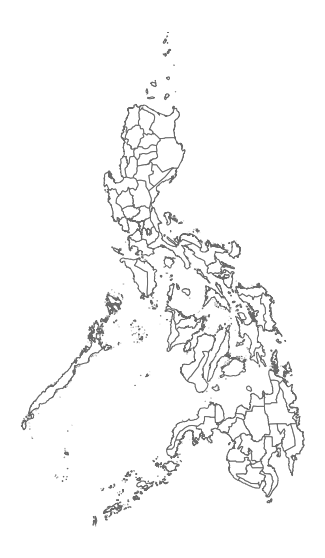

In [272]:
ax = ph.plot(figsize=(20,10), color="w", edgecolor="dimgray")

ax.axis('off')

GeoJson

In [273]:
# Read GeoJSON file
Hsites = gpd.read_file('/content/philippines.geojson', driver='GeoJSON')
Hsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,,,,6fb6d5acfc8841b9a093117a94750833,,,,,,,1.0,,2017-03-03T08:20:18,,,,MedCore,,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,,,,d658390a61644ef4a3197d66adf2ee8f,,,,,,,1.0,,2019-05-21T22:03:08,,,,City Health Office - Iligan City,,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,,,+6378 3020000;+6378 3043789;+6378 304 1410;+63...,d6b4acf850ac4a66a8331aa8fde2c9f1,,24/7,,,,,1.0,,2020-02-22T13:37:54,,,Tuguegarao,Cagayan Valley Medical Center,,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,,,,38170810204c4c2bb7753171ab92e186,,,,,,,1.0,yes,2018-06-25T10:54:52,,,,Se単or Santo Ni単o Hospital,,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


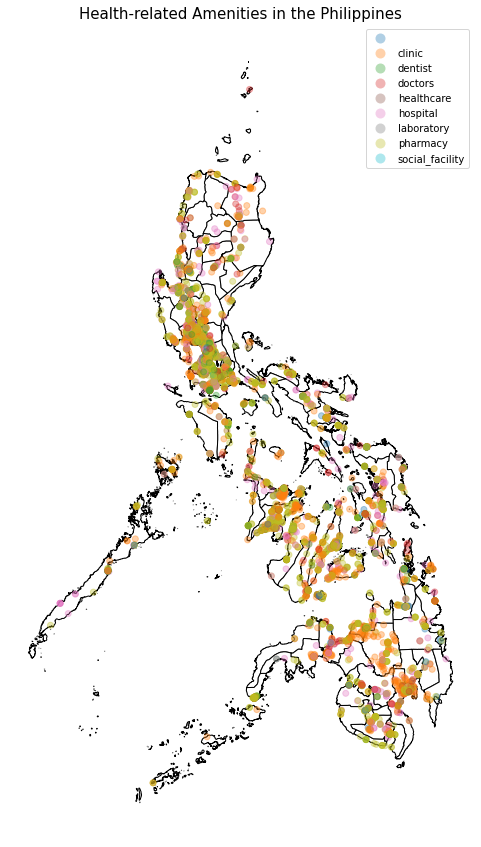

In [274]:
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='black')
Hsites.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

In [275]:
Hsites.isna().sum()

osm_id                     0
osm_type                   0
completeness               0
is_in_health_zone          0
amenity                    0
speciality                 0
addr_street                0
operator                   0
water_source               0
changeset_id              40
insurance                  0
staff_doctors              0
contact_number             0
uuid                       0
electricity                0
opening_hours              0
operational_status         0
source                     0
is_in_health_area          0
health_amenity_type        0
changeset_version         40
emergency                  0
changeset_timestamp       40
addr_housenumber           0
addr_postcode              0
addr_city                  0
name                       0
staff_nurses               0
changeset_user            40
wheelchair                 0
beds                       0
url                        0
dispensing                 0
healthcare                 0
operator_type 

##Separating Each kinds of Amenities

In [276]:
Hsites['amenity'].value_counts()

pharmacy           4078
clinic             2673
hospital           2085
dentist             698
doctors             441
                    393
laboratory           33
social_facility       3
healthcare            1
Name: amenity, dtype: int64

In [277]:
clinicdata= pd.DataFrame()
clinicdata= clinicdata.append(Hsites.loc[Hsites['amenity']=='clinic'])
clinicdata=clinicdata.reset_index(drop=True)
clinicdata.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,678983870,node,9.0,,clinic,,,,,4282186.0,,,,5a6298fbe1134b5682a5666d887b7eb4,,,,arivac,,,1.0,,2010-03-31T02:49:01,,,,,,arivac_bohol,,,,,,,None,None,POINT (123.98877 9.79335)
1,223628093,way,12.0,,clinic,,,,,55569745.0,,,,55afc9678ff54253870cb318bfa528a5,,,,"DigitalGlobe, NextView",,,4.0,,2018-01-19T06:47:28,,,,Santa Fe Main Health Center,,GOwin,,,,,,,None,None,"POLYGON ((123.80724 11.15379, 123.80734 11.153..."
2,4358211423,node,9.0,,clinic,,,,,41569012.0,,,,e1e92c08eb124c36ac03deaf88b305f5,,,,,,,1.0,,2016-08-20T02:44:31,,,,Pinamungajan Rural Health Office,,eli bryn,,,,,,,None,None,POINT (123.58445 10.27042)
3,150954402,way,21.0,,clinic,,Mindanao Avenue,,,78462500.0,,,,708b42b1a47042b9ad44899cebe4b193,,,,,,,6.0,,2019-12-16T08:37:04,,6000,Cebu,Maxicare Healthcare Corporation - Primary Care...,,raytsky123,,,,,clinic,,None,None,"POLYGON ((123.90701 10.31938, 123.90708 10.319..."
4,6374111785,node,18.0,,clinic,,Arnaldo Boulevard,,,68727612.0,,,,e9089037b2db4016bf09b63a15340415,,Mo-Su 09:00-07:00,,,,,1.0,,2019-03-31T15:31:23,,5800,,Ajera Dental Clinic,,Noela,,,,,,,None,None,POINT (122.75056 11.59396)


In [278]:
hospitaldata= pd.DataFrame()
hospitaldata= hospitaldata.append(Hsites.loc[Hsites['amenity']=='hospital'])
hospitaldata=hospitaldata.reset_index(drop=True)
hospitaldata.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,,,+6378 3020000;+6378 3043789;+6378 304 1410;+63...,d6b4acf850ac4a66a8331aa8fde2c9f1,,24/7,,,,,1.0,,2020-02-22T13:37:54,,,Tuguegarao,Cagayan Valley Medical Center,,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
1,601647960,way,12.0,,hospital,,,,,60145823.0,,,,38170810204c4c2bb7753171ab92e186,,,,,,,1.0,yes,2018-06-25T10:54:52,,,,Se単or Santo Ni単o Hospital,,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."
2,836665474,way,6.0,,hospital,,,,,89330707.0,,,,054199520a654010b97bc91a949413f1,,,,,,,1.0,,2020-08-13T04:26:53,,,,,,TagaSanPedroAko,,,,,,,None,None,"POLYGON ((123.52054 13.60460, 123.52061 13.604..."
3,164577919,way,9.0,,hospital,,,,,11669251.0,,,,b933ab64ce484210bd24e28feea97318,,,,,,,2.0,,2012-05-22T08:32:03,,,,Mateo Diagnostic Hospital,,DY3JDR,,,,,,,None,None,"POLYGON ((120.94741 14.80955, 120.94767 14.809..."
4,118806480,way,25.0,,hospital,,,Department of Health,,90566600.0,,,+6345 4552390;+6345 9612870 loc. 126;+6345 435...,af01a3d7ab0d48c698d4005d8e07100c,,,,,,,7.0,yes,2020-09-08T07:01:13,,,,Jose B. Lingad Memorial Regional Hospital,,jmres,,,,,hospital,government,None,None,"POLYGON ((120.68357 15.03443, 120.68441 15.035..."


In [279]:
dentistdata= pd.DataFrame()
dentistdata= dentistdata.append(Hsites.loc[Hsites['amenity']=='dentist'])
dentistdata=dentistdata.reset_index(drop=True)
dentistdata.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,3940989272,node,9.0,,dentist,,,,,36520157.0,,,,400e3290408b42dca0b4464c4890378c,,,,,,,1.0,,2016-01-12T06:48:29,,,,Olaguer Dental,,Albayano,,,,,,,None,None,POINT (123.74586 13.13973)
1,796284976,way,9.0,,dentist,,,,,84795442.0,,,,893a1a5f33244c50a96e9a8bd5d255e5,,,,,,,2.0,,2020-05-07T02:47:29,,,,,,GraniteBender,,,,,dentist,,None,None,"POLYGON ((121.05898 14.73862, 121.05904 14.738..."
2,6094206413,node,12.0,,dentist,,,,,64918083.0,,,,d1af050104014e4fae973b3b726524e5,,,,,,,1.0,,2018-11-27T02:01:14,,,,Beethoven Pedrera Dental Clinic,,antonggyox,,,,,dentist,,None,None,POINT (125.25121 10.35143)
3,409903248,way,12.0,,dentist,,,,,41077167.0,,,,f6abc35781884e57939d146ee4bb4068,,,,,,,4.0,,2016-07-28T04:58:03,,4119,Amadeo,,,schadow1,,,,,,,None,None,"POLYGON ((120.92430 14.17193, 120.92443 14.171..."
4,31929685,way,15.0,,dentist,dentistry,,,,73110112.0,,,,afb865e602eb4caf84c059926054db62,,,,,,,2.0,,2019-08-07T12:43:05,,,,St Angelique Dentist,,Chief Mike Kouklis,,,,,dentist,,None,None,"POLYGON ((121.92703 11.96480, 121.92710 11.964..."


In [280]:
doctorsdata= pd.DataFrame()
doctorsdata= doctorsdata.append(Hsites.loc[Hsites['amenity']=='doctors'])
doctorsdata=doctorsdata.reset_index(drop=True)
doctorsdata.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,6489465986,node,9.0,,doctors,,,,,70494207.0,,,,d658390a61644ef4a3197d66adf2ee8f,,,,,,,1.0,,2019-05-21T22:03:08,,,,City Health Office - Iligan City,,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
1,4361891690,node,15.0,,doctors,,Scout Dr. Lazcano,,,41620619.0,,,,6c702af37c4a49d89dac127cc8a229f6,,,,,,,1.0,,2016-08-22T18:10:30,73-G,,,NYTheraspine,,FortuneSolace,,,,,,,None,None,POINT (121.03133 14.63151)
2,1234678368,node,9.0,,doctors,,,,,14932205.0,,,,54c434cd8f5341319f65ff0ed29531ef,,,,,,,2.0,,2013-02-06T11:15:17,,,,District B Main Health Center,,docsam,,,,,,,None,None,POINT (125.60659 7.09059)
3,7785286855,node,15.0,,doctors,,,Dr. Joel Nicdao,,88948893.0,,,,e8cbb811bbf04c399e8db923270ab9a1,,,,,,,2.0,,2020-08-04T21:25:54,,,,McGill Mediplus,,mapbeks,,,,,doctor,,None,None,POINT (121.04419 14.55357)
4,192928381,way,15.0,,doctors,,,,,73347432.0,,,,a655861af2034bd8be7a83beac76b1b5,,,,docsam,,,2.0,,2019-08-14T12:46:27,,9000,,San Ignacio Medical Clinic,,XaintXinner,,,,,,,None,None,"POLYGON ((124.63661 8.47271, 124.63663 8.47287..."


In [281]:
laboratorydata= pd.DataFrame()
laboratorydata= laboratorydata.append(Hsites.loc[Hsites['amenity']=='laboratory'])
laboratorydata=laboratorydata.reset_index(drop=True)
laboratorydata.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,8076445521,node,28.0,,laboratory,,Jose Abad Santos Avenue,Dr. Almalyn C. Sevilla,water_works,93449504.0,,,,8ec8ea24e5e34d5d98a76c9c3c65350f,,,,survey,,,1.0,,2020-11-03T03:51:00,,,,Hunter Valley Diagnostic Laboratory,,KristeleH,,,,,laboratory,private,None,None,POINT (120.56590 14.91255)
1,8027571236,node,21.0,,laboratory,,,,water_works,93653289.0,,,,eef1e74ee1544e638d3da8ba6fa5520d,,,,survey,,,2.0,,2020-11-06T09:29:10,,,,Saint Agustine Dialysis Center,,mdgabriel,,,,,clinic,private,None,None,POINT (120.59950 14.93798)
2,7871507758,node,25.0,,laboratory,,Guagua - Santa Rita Arterial Road,,powered_pump,90854817.0,,,,1ab1dae446304605aab4e86db786023d,,,,survey,,,3.0,,2020-09-14T09:20:39,,,,West Pampanga Diagnostic Center Inc.,,mdgabriel,,,,,laboratory,private,None,None,POINT (120.62209 14.98525)
3,7882974325,node,21.0,,laboratory,,Mc Arthur Highway,,,97287426.0,,,,bd26957ae29946f286b30e5d82fa3e1e,,,,survey,,,3.0,,2021-01-11T07:45:56,,,,Capati-Sunglao Medical Laboratory,,GOwin,,,,,laboratory,private,None,None,POINT (120.65281 14.99936)
4,774714798,way,28.0,,laboratory,,Santo Niño,Apple Joy Cortez;Dr. Michelle Tanglao-Miranda;...,water_works,92219792.0,,,,937c0092942f48ecb9e16e5319adabbb,,,,survey,,,2.0,,2020-10-09T08:08:18,,,,ACC Medical Diagnostic Laboratory,,andreaverissa,,,,,laboratory,private,None,None,"POLYGON ((120.56986 15.12683, 120.56995 15.127..."


In [282]:
social_facilitydata= pd.DataFrame()
social_facilitydata= social_facilitydata.append(Hsites.loc[healthsites['amenity']=='social_facility'])
social_facilitydata=social_facilitydata.reset_index(drop=True)
social_facilitydata.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,5002375322,node,18.0,,social_facility,,Santo Rosario,,,50707968.0,,,,7ff81fbb74ad43fb9f92a828d074a479,,,,,,,2.0,,2017-07-31T05:16:13,,3004,,Bahay Pagbabago,,GOwin,,,,,rehabilitation,,None,None,POINT (120.85745 14.86977)
1,7039925386,node,25.0,,social_facility,blood_check,,Lucena Social Hygiene Clinic,,82415190.0,,,+63 42 710 8380,f965a066e9c54d3e8c30011400c38c99,,,,,,,3.0,,2020-03-20T05:10:12,,,,Lucena Social Hygiene Clinic,,GOwin,,,,,laboratory,government,None,None,POINT (121.61098 13.94791)
2,7123677187,node,21.0,,social_facility,blood_check,,Saint Frances Cabrini Medical Center,,79522325.0,,,+6343 7784811; +6343 3182432,ce3b26b928f94c98840ac14ab7893985,,,,,,,3.0,,2020-01-13T18:15:52,,,,,,GrabPHMikko,,,,,laboratory,private,None,None,POINT (121.14516 14.10903)


In [283]:
healthcaredata= pd.DataFrame()
healthcaredata= healthcaredata.append(Hsites.loc[Hsites['amenity']=='healthcare'])
healthcaredata=healthcaredata.reset_index(drop=True)
healthcaredata.head(5)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,5950372084,node,15.0,,healthcare,,General T. de Leon,,,84991753.0,,,,2ed104a068eb4080a22d3e1626ae646d,,,,,,,2.0,,2020-05-11T01:04:16,,,,Peso Plus Drug,,GOwin,,,,,pharmacy,,None,None,POINT (120.97741 14.68952)


##Exercise

###Metro Manila

Separating Data for Metro Manila

In [284]:
MM = ph[ph.NAME_1=="Metropolitan Manila"]

MM_clinic = gpd.sjoin(clinicdata, MM, op='within')
MM_clinic= MM_clinic.reset_index(drop=True)


MM_pharmacy = gpd.sjoin(pharmacydata, MM, op='within')
MM_pharmacy = MM_pharmacy.reset_index(drop=True)


MM_hospital = gpd.sjoin(hospitaldata, MM, op='within')
MM_hospital = MM_hospital.reset_index(drop=True)


MM_dentist = gpd.sjoin(dentistdata, MM, op='within')
MM_dentist = MM_dentist.reset_index(drop=True)


MM_doctors = gpd.sjoin(doctorsdata, MM, op='within')
MM_doctors = MM_doctors.reset_index(drop=True)


MM_laboratory = gpd.sjoin(laboratorydata, MM, op='within')
MM_laboratory = MM_laboratory.reset_index(drop=True)


MM_social_facility = gpd.sjoin(social_facilitydata, MM, op='within')
MM_social_facility = MM_social_facility.reset_index(drop=True)


MM_healthcare = gpd.sjoin(healthcaredata, MM, op='within')
MM_healthcare = MM_healthcare.reset_index(drop=True)

Check if the data is not NaN

In [285]:
MM_clinic.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,5920487685,node,18.0,,clinic,,Quirino Highway,,,83885861.0,,,,c14e8661af6449b295ffd83f98e92057,,Mo-Sa 09:00-18:00,,,,,3.0,,2020-04-21T14:08:42,2,,,M.K.Bumagat Dental Clinic,,RAytoun,,,,,,,None,None,POINT (121.07758 14.74410),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


In [286]:
MM_pharmacy.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,,,,c95ed8224a844508b7e2539345b8d7a3,,Mo-Su 07:00-22:00,,,,,4.0,,2020-06-08T05:58:39,,,,Mercury Drug,,mipangan,,,,,,,None,None,POINT (121.02008 14.66840),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


In [287]:
MM_hospital.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,7278748585,node,25.0,,hospital,,Quirino Highway,,,85720762.0,,,,b9e0c7a0573947f59cf999c83c4257e9,,,,,,,3.0,,2020-05-25T14:11:24,411,1116,Quezon City,Vian Family Hospital II,,ianlopez1115,,,,,,private,None,None,POINT (121.02106 14.68285),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


In [288]:
MM_dentist.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,796284976,way,9.0,,dentist,,,,,84795442.0,,,,893a1a5f33244c50a96e9a8bd5d255e5,,,,,,,2.0,,2020-05-07T02:47:29,,,,,,GraniteBender,,,,,dentist,,None,None,"POLYGON ((121.05898 14.73862, 121.05904 14.738...",46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


In [289]:
MM_doctors.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,4361891690,node,15.0,,doctors,,Scout Dr. Lazcano,,,41620619.0,,,,6c702af37c4a49d89dac127cc8a229f6,,,,,,,1.0,,2016-08-22T18:10:30,73-G,,,NYTheraspine,,FortuneSolace,,,,,,,None,None,POINT (121.03133 14.63151),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


In [290]:
MM_laboratory.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1


In [291]:
MM_social_facility.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1


In [292]:
MM_healthcare.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,5950372084,node,15.0,,healthcare,,General T. de Leon,,,84991753.0,,,,2ed104a068eb4080a22d3e1626ae646d,,,,,,,2.0,,2020-05-11T01:04:16,,,,Peso Plus Drug,,GOwin,,,,,pharmacy,,None,None,POINT (120.97741 14.68952),46,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,None,Lalawigan|Probinsya,Province,1339,PH.MM


Visuals of Different Health related Amenities and their counts in Metro Manila

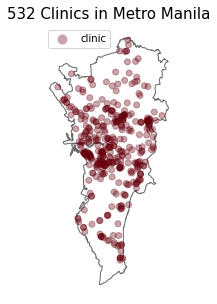

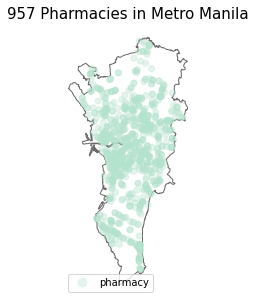

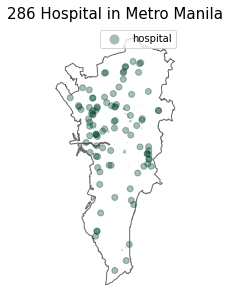

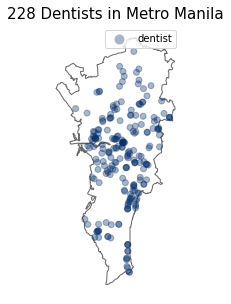

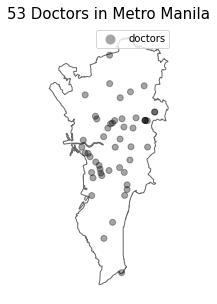

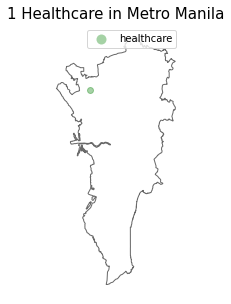

In [293]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
MM.plot(ax=ax, color='white', edgecolor='dimgray')
MM_clinic.plot(ax=ax, column="amenity", cmap="Reds_r", alpha=0.35, legend=True)
ax.set_title(str(len(MM_clinic.index))+' Clinics in Metro Manila', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
MM.plot(ax=ax, color='white', edgecolor='dimgray')
MM_pharmacy.plot(ax=ax, column="amenity", cmap="Pastel2", alpha=0.35, legend=True)
ax.set_title(str(len(MM_pharmacy.index))+' Pharmacies in Metro Manila', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
MM.plot(ax=ax, color='white', edgecolor='dimgray')
MM_hospital.plot(ax=ax, column="amenity", cmap="YlGn_r", alpha=0.35, legend=True)
ax.set_title(str(len(MM_hospital.index))+ ' Hospital in Metro Manila', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
MM.plot(ax=ax, color='white', edgecolor='dimgray')
MM_dentist.plot(ax=ax, column="amenity", cmap="Blues_r", alpha=0.35, legend=True)
ax.set_title(str(len(MM_dentist.index))+ ' Dentists in Metro Manila', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
MM.plot(ax=ax, color='white', edgecolor='dimgray')
MM_doctors.plot(ax=ax, column="amenity", cmap="magma", alpha=0.35, legend=True)
ax.set_title(str(len(MM_doctors.index))+ ' Doctors in Metro Manila', fontsize=15)
ax.axis('off');

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
MM.plot(ax=ax, color='white', edgecolor='dimgray')
MM_healthcare.plot(ax=ax, column="amenity", cmap="ocean", alpha=0.35, legend=True)
ax.set_title(str(len(MM_healthcare.index))+' Healthcare in Metro Manila', fontsize=15)
ax.axis('off');

###Cebu

Separating Data for Cebu

In [294]:
CB = ph[ph.NAME_1=="Cebu"]

CB_clinic = gpd.sjoin(clinicdata, CB, op='within')
CB_clinic= CB_clinic.reset_index(drop=True)


CB_pharmacy = gpd.sjoin(pharmacydata, CB, op='within')
CB_pharmacy = CB_pharmacy.reset_index(drop=True)


CB_hospital = gpd.sjoin(hospitaldata, CB, op='within')
CB_hospital = CB_hospital.reset_index(drop=True)


CB_dentist = gpd.sjoin(dentistdata, CB, op='within')
CB_dentist = CB_dentist.reset_index(drop=True)


CB_doctors = gpd.sjoin(doctorsdata, CB, op='within')
CB_doctors = CB_doctors.reset_index(drop=True)


CB_laboratory = gpd.sjoin(laboratorydata, CB, op='within')
CB_laboratory = CB_laboratory.reset_index(drop=True)


CB_social_facility = gpd.sjoin(social_facilitydata, CB, op='within')
CB_social_facility = CB_social_facility.reset_index(drop=True)


CB_healthcare = gpd.sjoin(healthcaredata, CB, op='within')
CB_healthcare = CB_healthcare.reset_index(drop=True)

In [295]:
CB_clinic.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,223628093,way,12.0,,clinic,,,,,55569745.0,,,,55afc9678ff54253870cb318bfa528a5,,,,"DigitalGlobe, NextView",,,4.0,,2018-01-19T06:47:28,,,,Santa Fe Main Health Center,,GOwin,,,,,,,None,None,"POLYGON ((123.80724 11.15379, 123.80734 11.153...",24,PHL,Philippines,PHL.25_1,Cebu,None,None,Lalawigan|Probinsya,Province,722,PH.CB


Check if the data is not NaN

In [296]:
CB_pharmacy.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,475925203,node,12.0,,pharmacy,,,,,79533140.0,,,,f015fd0421bd4d5d8e8a3386f19147d6,,,,,,,5.0,,2020-01-13T21:00:22,,,,TGP,,Zassenhaus,,,,,pharmacy,,None,None,POINT (123.89531 10.29767),24,PHL,Philippines,PHL.25_1,Cebu,None,None,Lalawigan|Probinsya,Province,722,PH.CB


In [297]:
CB_hospital.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,413986526,node,12.0,,hospital,,,,,78959886.0,,,,f58ee57181cb4dc5ae0a6abc3c10270d,,,,,,,7.0,,2019-12-28T16:47:35,,,,Cebu City Medical Center,,GrabPHMikko,,,,,hospital,,None,None,POINT (123.89283 10.29791),24,PHL,Philippines,PHL.25_1,Cebu,None,None,Lalawigan|Probinsya,Province,722,PH.CB


In [298]:
CB_dentist.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,5907483588,node,9.0,,dentist,,,,,62600384.0,,,,29c4d56aae5049b9ba745e26d92d2b96,,,,,,,1.0,,2018-09-15T04:08:28,,,,Dentist,,German Traveller,,,,,,,None,None,POINT (124.00999 10.30696),24,PHL,Philippines,PHL.25_1,Cebu,None,None,Lalawigan|Probinsya,Province,722,PH.CB


In [299]:
CB_doctors.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,4435499590,node,15.0,,doctors,,,,,56969124.0,,,,a9ca9ea0dc7547939fa08fc6fb112514,,Mo-Fr 08:00-17:00,,,,,2.0,,2018-03-07T13:40:25,,,,Rural Health Unit,,GOwin,,,,,doctor,,None,None,POINT (123.54913 10.22190),24,PHL,Philippines,PHL.25_1,Cebu,None,None,Lalawigan|Probinsya,Province,722,PH.CB


In [300]:
CB_laboratory.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1


In [301]:
CB_social_facility.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1


In [304]:
CB_healthcare.head(1)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,insurance,staff_doctors,contact_number,uuid,electricity,opening_hours,operational_status,source,is_in_health_area,health_amenity_type,changeset_version,emergency,changeset_timestamp,addr_housenumber,addr_postcode,addr_city,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry,index_right,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1


Visuals of Different Health related Amenities and their counts in Cebu

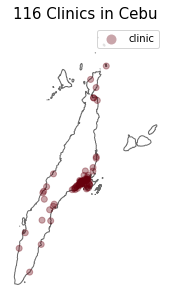

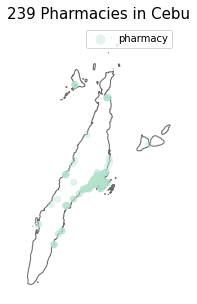

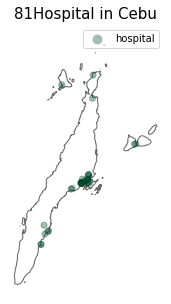

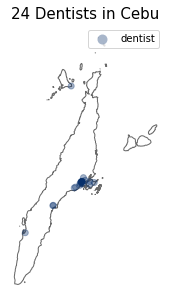

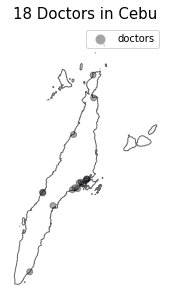

In [303]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
CB.plot(ax=ax, color='white', edgecolor='dimgray')
CB_clinic.plot(ax=ax, column="amenity", cmap="Reds_r", alpha=0.35, legend=True)
ax.set_title(str(len(CB_clinic.index))+' Clinics in Cebu', fontsize=15)
ax.axis('off');
 
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
CB.plot(ax=ax, color='white', edgecolor='dimgray')
CB_pharmacy.plot(ax=ax, column="amenity", cmap="Pastel2", alpha=0.35, legend=True)
ax.set_title(str(len(CB_pharmacy.index))+ ' Pharmacies in Cebu', fontsize=15)
ax.axis('off');
 
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
CB.plot(ax=ax, color='white', edgecolor='dimgray')
CB_hospital.plot(ax=ax, column="amenity", cmap="YlGn_r", alpha=0.35, legend=True)
ax.set_title(str(len(CB_hospital.index))+'Hospital in Cebu', fontsize=15)
ax.axis('off');
 
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
CB.plot(ax=ax, color='white', edgecolor='dimgray')
CB_dentist.plot(ax=ax, column="amenity", cmap="Blues_r", alpha=0.35, legend=True)
ax.set_title(str(len(CB_dentist.index))+' Dentists in Cebu', fontsize=15)
ax.axis('off');
 
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
CB.plot(ax=ax, color='white', edgecolor='dimgray')
CB_doctors.plot(ax=ax, column="amenity", cmap="magma", alpha=0.35, legend=True)
ax.set_title(str(len(CB_doctors.index))+' Doctors in Cebu', fontsize=15)
ax.axis('off');
 

